In [27]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\dai\Desktop\S-AI\MachineLearning\Day12\Datasets")
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing
from scipy.special import boxcox, inv_boxcox
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima

In [11]:
bnk= pd.read_csv('BUNDESBANK-BBK01_WT5511.csv',index_col=0)

<Axes: xlabel='Date'>

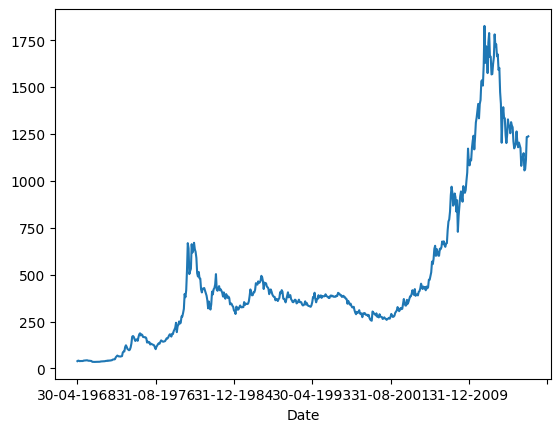

In [13]:
y = bnk['Value']
y.plot()

In [128]:
len(bnk['Value'])


577

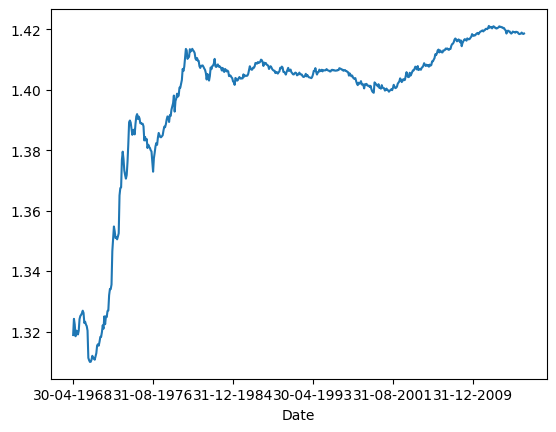

In [72]:
lamb = -0.7
y = bnk['Value']
y_train = y[:-12]
y_test = y[-12:]
y_trns_trn = boxcox(y_train,lamb)
y_trns_trn.plot()
plt.show()

In [77]:
 model1 = auto_arima(y_trns_trn,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-5454.663, Time=0.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-5462.654, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-5574.925, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-5674.590, Time=0.22 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-5686.684, Time=0.33 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-5685.687, Time=0.48 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-5456.644, Time=0.58 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-5699.892, Time=0.50 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-5739.347, Time=0.43 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-5737.509, Time=0.78 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=-5689.979, Time=1.28 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=-5454.669, Time=1.03 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=-5528.836, Time=1.07 sec
 ARIMA(1,2,3)(0,0,0)[0] i

In [79]:
y_pred = model1.predict(n_periods=len(y_test))
y_trns_itrn =inv_boxcox(y_pred,lamb)
root_mean_squared_error(y_test, y_trns_itrn)


77.87841305788743

In [51]:
y_pred.values, y_test.values

(array([203.55756017, 203.88735673, 204.2171533 , 204.54694986,
        204.87674643, 205.20654299, 205.53633956, 205.86613613,
        206.19593269, 206.52572926, 206.85552582, 207.18532239]),
 array([1190.4 , 1175.  , 1080.05, 1125.5 , 1122.5 , 1147.75, 1055.65,
        1062.25, 1112.9 , 1234.15, 1233.6 , 1237.7 ]))

<Axes: >

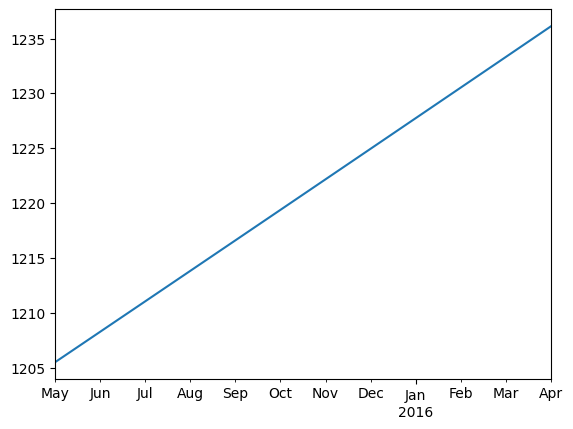

In [59]:
y_trns_itrn.plot()


In [71]:
 model1 = auto_arima(y_trns_trn,seasonal=True,m=12 , trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4845.871, Time=2.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4849.504, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4848.130, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4847.650, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4849.719, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4843.871, Time=2.17 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=4841.871, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=4848.474, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=4848.456, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=4852.455, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=4843.537, Time=1.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4847.270, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=4850.527, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[12]

In [75]:
y_pred = model1.predict(n_periods=len(y_test))
y_trns_itrn =inv_boxcox(y_pred,lamb)
root_mean_squared_error(y_test, y_trns_itrn)


ValueError: Input contains NaN.

### AUS GAS

In [89]:
gas = pd.read_csv('AusGas.csv',index_col=0)
gas.shape

(476, 1)

<Axes: xlabel='Month'>

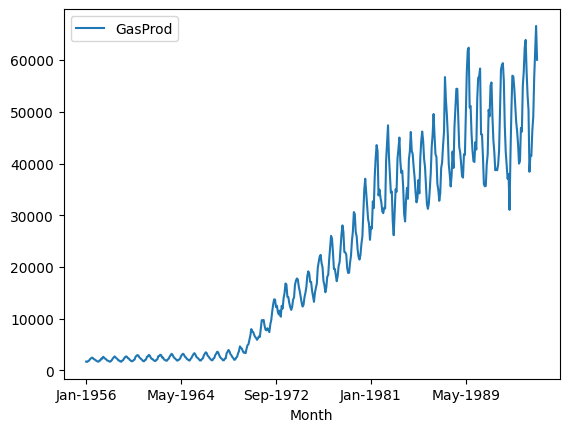

In [93]:
y_train = gas[:-12]
y_test = gas[-12:]
gas.plot()


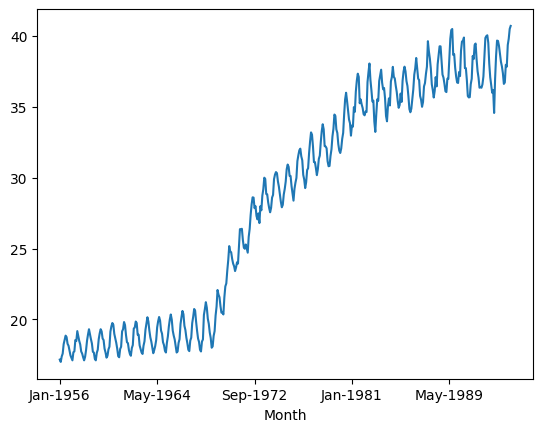

In [123]:
lamb = 0.2
y = gas['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_trns_trn = boxcox(y_train,lamb)
y_trns_trn.plot()
plt.show()

In [125]:
 model1 = auto_arima(y_trns_trn, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=578.135, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=951.615, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=895.744, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=914.982, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=952.252, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=897.437, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=879.314, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=529.511, Time=0.95 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=733.966, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=510.380, Time=1.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=692.760, Time=0.65 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=542.134, Time=1.80 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=521.440, Time=1.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=574.004, Time=1.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=667.5

In [115]:
y_pred = model1.predict(n_periods=len(y_test))
y_trns_itrn =inv_boxcox(y_pred,lamb)
root_mean_squared_error(y_test, y_trns_itrn)


130462.17088326054

<Axes: >

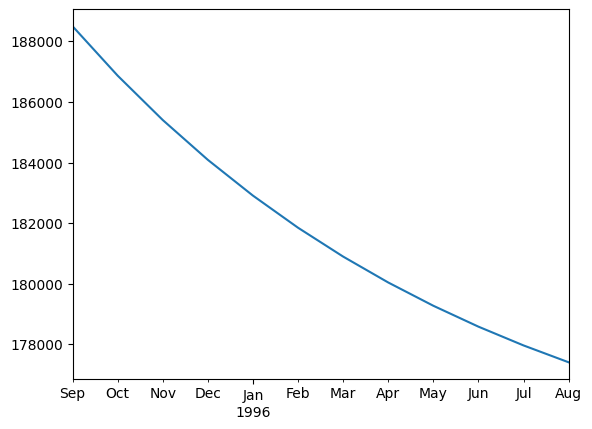

In [117]:
y_trns_itrn.plot()


In [130]:


holt_w = ExponentialSmoothing(y_trns_itrn, seasonal_periods=12, trend='add', seasonal='add',damped_trend=True)
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt_w_fit = holt_w.fit()
holt_w_fcast = holt_w_fit.forecast(len(y_test))
# A series to store the forecasted values of y_test
holt_w_fcast_ser = pd.Series(holt_w_fcast, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,holt_w_fcast_ser),2)
y_test.index = holt_w_fcast_ser.index
# now plotting the lineplot for the same
plt.text(8,50000,'RMSE: '+str(rmse))
sns.lineplot(y_test, label='Actual Values(test)')
sns.lineplot(holt_w_fcast_ser,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.